In [232]:
import sklearn

In [233]:
import matplotlib.pyplot as plt


In [234]:
import pandas as pd

In [235]:
df = pd.read_csv("ufc-master.csv/ufc-master.csv")

In [236]:
y = df["finish"]

In [237]:
not_include_list = ["R_odds","B_odds","R_ev","B_ev","r_dec_odds","b_dec_odds","r_sub_odds","b_sub_odds","r_ko_odds","b_ko_odds","date","location","country","R_fighter","B_fighter","finish","finish_details","finish_round_time","total_fight_time_secs"]

In [238]:
processed_df = df.drop(columns=not_include_list)

In [239]:
X = processed_df.drop(columns=["Winner"])

In [240]:
y = processed_df['Winner']

In [241]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder

# # Assuming df is your DataFrame

# # Identify string columns
# string_columns = X.select_dtypes(include='object').columns

# # Create an empty DataFrame to store the encoded columns
# one_hot_df = pd.DataFrame()

# # Create an instance of the OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')

# # Loop through the string columns
# for column in string_columns:
#     # Convert the column to a numpy array
#     array = X[column].values.reshape(-1, 1)

#     # Fit and transform the array
#     encoded = enc.fit_transform(array)

#     # Convert the array to a DataFrame
#     encoded_df = pd.DataFrame(encoded.toarray(), columns=enc.categories_[0])

#     # Concatenate the encoded DataFrame to the one_hot_df
#     one_hot_df = pd.concat([one_hot_df, encoded_df], axis=1)

# # Concatenate the original DataFrame and the one_hot_df
# new_df = pd.concat([X.drop(string_columns, axis=1), one_hot_df], axis=1)

In [242]:
X = X.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
string_cols = X.select_dtypes(['object']).columns

# one-hot encode all string columns
new_df = pd.get_dummies(X, columns=string_cols, drop_first=True)

new_df.head()

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,...,weight_class_Women's Strawweight,gender_MALE,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,better_rank_Red,better_rank_neither
0,False,5,0,1,0,3.42,0.59,0.7,0.24,1.00,...,0,1,1,0,0,1,0,0,1,0
1,False,3,2,0,0,5.16,0.42,0.8,0.79,0.22,...,0,1,1,0,0,1,0,0,0,1
2,False,3,1,0,0,2.92,0.41,0.1,1.15,0.34,...,0,1,0,1,0,1,0,0,0,1
3,False,3,1,0,0,4.04,0.34,0.0,0.00,0.00,...,0,1,1,0,0,1,0,0,0,1
4,False,3,0,2,0,5.22,0.56,0.0,2.54,0.39,...,0,1,1,0,0,1,0,0,0,1


In [243]:
for col in new_df.columns:
    print(col)

title_bout
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_dif
total_round_dif
total_title_bout_dif
ko_dif
sub_dif
height_dif
reach_dif
age_dif
sig_str_dif
avg_sub_att_di

In [244]:
# select all boolean columns
bool_cols = new_df.select_dtypes(['bool']).columns

# convert boolean values to 0/1
new_df[bool_cols] = new_df[bool_cols].astype(int)

In [245]:
X = new_df

In [246]:
y = df["Winner"]

In [247]:
from sklearn.preprocessing import LabelEncoder

# assume 'df' is your dataframe and 'column_name' is the column you want to label encode
le = LabelEncoder()

y = le.fit_transform(y)

In [248]:
import sklearn.linear_model


model = sklearn.linear_model.LogisticRegression()

In [249]:
import pandas as pd

# assume 'df' is your dataframe

# get columns with NaN values
nan_cols = X.columns[X.isna().any()].tolist()

print(nan_cols)  # list of column names with NaN values

['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'B_match_weightclass_rank', 'R_match_weightclass_rank', "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", 'R_Heavyweight_rank', 'R_Light Heavyweight_rank', 'R_Middleweight_rank', 'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank', 'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank', "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 'B_Light Heavyweight_rank', 'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank', 'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-Pound_rank', 'finish_round']


In [250]:
# columns = ['R_odds', 'R_ev', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'B_match_weightclass_rank', 'R_match_weightclass_rank', "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", 'R_Heavyweight_rank', 'R_Light Heavyweight_rank', 'R_Middleweight_rank', 'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank', 'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank', "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 'B_Light Heavyweight_rank', 'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank', 'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-Pound_rank', 'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds']

for col in nan_cols:
    X[f'is_nan_{col}'] = X[col].isna().astype(int)
    X[col] = X[col].fillna(0)

In [251]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [252]:
model.fit(X,y)

c:\Users\adipk\myapps\software\envs\alphazero\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [255]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [256]:
model.fit(X_train,y_train)

c:\Users\adipk\myapps\software\envs\alphazero\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [257]:
model.score(X_test,y_test)

0.5928571428571429

In [258]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=0.95)  # retain 95% of the variance

# Fit the PCA object to the data and transform it
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (4896, 154)
Transformed shape: (4896, 8)


In [381]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=0.95)  # retain 95% of the variance

# Fit the PCA object to the data and transform it
X_pca = pca.fit_transform(X)

# Get the most important columns (features)
importance = pca.components_[0]

# Get the feature names
feature_names = X.columns

# Sort the feature names by importance
sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")

Top 10 most important features:
B_avg_SIG_STR_landed: 0.7395
R_avg_SIG_STR_landed: 0.6563
B_total_rounds_fought: 0.1127
R_Reach_cms: -0.0608
R_Height_cms: -0.0481
B_Reach_cms: -0.0475
B_Height_cms: -0.0376
B_avg_TD_landed: 0.0061
R_age: 0.0045
R_avg_TD_landed: 0.0041


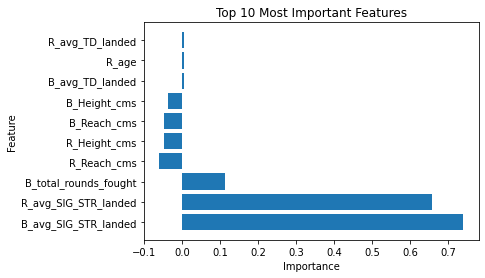

In [382]:
import matplotlib.pyplot as plt

# Get the top 10 most important features
# sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Extract the feature names and importance values
feature_names = [x[0] for x in sorted_features[:10]]
importance_values = [x[1] for x in sorted_features[:10]]

# Create a bar graph
plt.barh(range(len(feature_names)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [261]:
from sklearn import svm
clf = svm.SVC()

In [262]:
clf.fit(X_train, y_train)

SVC()

In [263]:
clf.score(X_test,y_test)

0.5785714285714286

In [264]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [265]:
clf = GradientBoostingClassifier(n_estimators=100,max_depth=10).fit(X_train, y_train)

In [266]:
clf.score(X_test,y_test)

0.5755102040816327

In [268]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=8,criterion="entropy").fit(X_train, y_train)

In [270]:
clf.score(X_test,y_test)

0.5826530612244898

In [271]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [272]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=9,criterion="entropy").fit(X_train, y_train)

In [273]:
clf.score(X_test,y_test)

0.610204081632653

In [274]:
from sklearn.neural_network import MLPClassifier

In [294]:
clf = MLPClassifier(alpha=1e-4,
hidden_layer_sizes=(20, 20))

In [295]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20))

In [296]:
clf.score(X_train,y_train)

0.6146578140960164

In [298]:
for col in X.columns:
    print(col)

title_bout
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_dif
total_round_dif
total_title_bout_dif
ko_dif
sub_dif
height_dif
reach_dif
age_dif
sig_str_dif
avg_sub_att_di

In [384]:
include_list = ["B_avg_SIG_STR_landed",
"B_avg_SIG_STR_pct",
"B_avg_SUB_ATT",
"B_avg_TD_landed",
"B_avg_TD_pct",
"B_total_rounds_fought",
"B_Height_cms",
"B_Reach_cms",
"R_avg_SIG_STR_landed",
"R_avg_SIG_STR_pct",
"R_avg_SUB_ATT",
"R_avg_TD_landed",
"R_avg_TD_pct",
"R_Height_cms",
"R_Reach_cms",
"R_age",
"B_age",
"lose_streak_dif",
"win_streak_dif",
"longest_win_streak_dif",
"win_dif",
"loss_dif",
"total_round_dif",
"total_title_bout_dif",
"ko_dif",
"sub_dif",
"height_dif",
"reach_dif",
"age_dif",
"sig_str_dif",
"avg_sub_att_dif",
"avg_td_dif"]

In [385]:
len(include_list)

32

In [300]:
X   = X[include_list]

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [336]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=9).fit(X_train, y_train)

In [337]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [338]:
clf.score(X_train,y_train)

0.8370786516853933

In [339]:
clf.score(X_test,y_test)

0.613265306122449

In [374]:
clf = GradientBoostingClassifier(n_estimators=100,max_depth=2).fit(X_train, y_train)

In [375]:
clf.score(X_train,y_train)

0.6491317671092952

In [376]:
clf.score(X_test,y_test)

0.6071428571428571

In [377]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [ ]:
clf = model.fit(X_train, y_train)

In [379]:
clf.score(X_train,y_train)

0.6118488253319714

In [380]:
clf.score(X_test,y_test)

0.5989795918367347